# Problem 12.1

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.1**


**In this problem, we will review the method to extract the main parameters in the I-V curve presented in Chapter 4. Let us assume that we have measured the dark I-V curve of a 10 cm$^2$ solar cell at 25 $^{\circ}$C. The tabulated data is provided in this book’s online repository. The series resistance $R_s$ can be assumed to be zero so the dark I-V curve equation is:**

$I = I_0(e^{(qV/nkT)}-1)+ \frac{V}{R_p}$

**Estimate the reverse saturation current $I_0$, the diode ideality factor $n$, and discuss the potential effect of the parallel resistance $R_p$**.

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

We start by importing the data from the dark I-V curves.

In [2]:
dark_IV = pd.read_csv('data/Dark_I_V_curve.csv',  header=0) 
dark_IV.head()

,V (V),I (A)
0,0.1598,0.000003
1,0.2239,0.000004
2,0.2657,0.000006
3,0.3099,0.000008
4,0.3568,0.000011


Following the strategy described in the Advanced Materials of Chapter 4 (Dark I-V curve of solar cells), we plot the curve using a log y-axis.

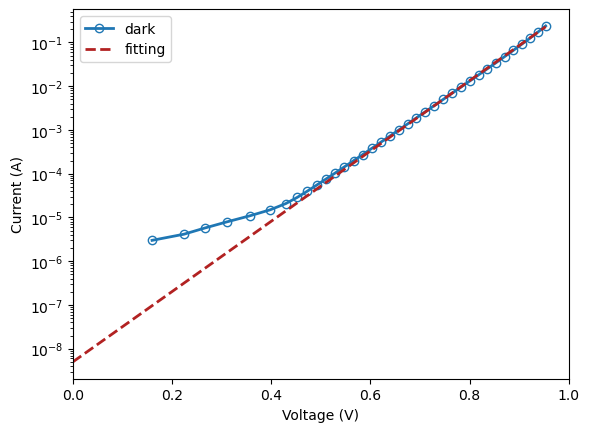

In [3]:
plt.plot(dark_IV['V (V)'], dark_IV['I (A)'],
         linewidth=2, marker='o', markerfacecolor="None",
         label='dark')
plt.yscale('log')
plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.xlim([0,1])


#fit the dark IV curve plotted with a log y-axis
value_at_0V=5*10**-9
slope=18.5
plt.plot(np.append(0, dark_IV['V (V)'].values), 
         [math.exp(math.log(value_at_0V)+slope*V) for V in np.append(0, dark_IV['V (V)'].values)],
         linewidth=2, linestyle='--',color='firebrick',
         label='fitting')
plt.legend()

We have also plotted the linear fit to the dark IV curve ploted using a log y axis. 
The slope of the curve allow us the calculate the ideality coefficient.

$ln(I)=ln(I_0)+ \frac{V}{nKT/q}$

In [4]:
#assuming that the measuremen was taking at 25C
KT_q=0.025

n=1/(slope*KT_q)
print("n = " + str(round(n,2)))

n = 2.16


The value of the fit at 0V indicates the reverse saturation current

In [5]:
I_0=value_at_0V
print("I_0 = " + str(I_0))

I_0 = 5e-09


The deviation of the IV curve from the linear fitting (in log-y representation) for high voltage values represents the effect of series resistance $R_s$. In this case, the fitting is almost perfect, indicating that there is no significant $R_s$.

The deviation of the IV curve from the linear fitting (in log-y representation) for low volage values represents the effect of parallel resistance $R_p$. In this case, the curve deviates from the linear fitting but only at current values below $10^{-4}$. As discussed in the Advanced Materials of Chapter 4, this should not create any significant reduction in the cell FF or efficiency. 